<a href="https://colab.research.google.com/github/ilyanovak/DS-Unit-2-Kaggle-Challenge/blob/master/Sprint_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint Review*

---

# Sprint Challenge Review

**1. Begin with baselines for classification.**

**2. Hold out your test set.**



**3. Decide how to validate** your model. Choose one of the following options. Any of these options are good. You are not graded on which you choose.
- **Train/validate/test split: random 80/20%** train/validate split.
- **Cross-validation** with independent test set. You may use any scikit-learn cross-validation method.

**4.** Use a scikit-learn **pipeline** to **encode categoricals** and fit a **Decision Tree** or **Random Forest** model.

**5.** Get your model's **validation accuracy.** 

**6.** Get your model's **test accuracy.** (One time, at the end.)


**7.** Given a **confusion matrix** for a hypothetical binary classification model, **calculate accuracy, precision, and recall.**

# The DATA


### UCI Heart Disease Dataset

Link to kaggle : 
https://www.kaggle.com/ronitf/heart-disease-uci#heart.csv


Link to download file :
https://www.kaggle.com/ronitf/heart-disease-uci/download




Your goal is to make a model that can predict whether a person will get heart 

### Attribute Information

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [0]:
import pandas as pd

data = pd.read_csv("/content/heart.csv")

In [67]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Baseline - Classification

In [68]:
data['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

## Split data - Decide how to validate your model

In [0]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(data,
                              train_size=0.8,
                              test_size=0.2,
                              stratify=data['target'],
                              random_state=42)

In [0]:
features = data.drop(columns='target').columns
target = 'target'

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [0]:
%%capture

from sklearn.pipeline import make_pipeline

!pip install --upgrade category_encoders
import category_encoders as ce

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [113]:
pipeline = make_pipeline(
  ce.one_hot.OrdinalEncoder(),
  SimpleImputer(strategy='median'),
  StandardScaler(),
  LogisticRegressionCV(multi_class='auto',
                     solver='lbfgs',
                     cv=4,
                     n_jobs=-1)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)  
print("Training Score:", pipeline.score(X_train, y_train))
print("Validation Score:", pipeline.score(X_val, y_val))

Training Score: 0.8305785123966942
Validation Score: 0.819672131147541


# Scikit-Learn Pipeline 
- Encode Categoricals
- Fit a Decision Tree or Random Forest model

In [106]:
pipeline2 = make_pipeline(
  ce.one_hot.OrdinalEncoder(),
  SimpleImputer(strategy='median'),
  StandardScaler(),
  RandomForestClassifier(n_estimators=100,
                         n_jobs=-1,
                         random_state=42)

)

pipeline2.fit(X_train, y_train)

Training Score: 1.0
Validation Score: 0.8360655737704918


### Validation Accuracy

In [0]:
print("Validation Score:", pipeline2.score(X_val, y_val))

### Test Accuracy

In [0]:
print("Training Score:", pipeline2.score(X_train, y_train))

Given a confusion matrix, calculate accuracy, precision, and recall.

Use the confusion matrix to calculate the model's accuracy, precision, and recall.

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">30</td>
    <td style="border: solid">4</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">99</td>
    <td style="border: solid"> 12</td>
  </tr>
</table>

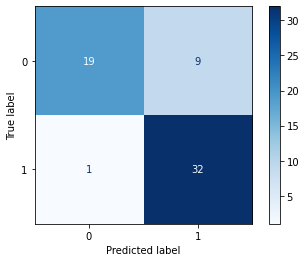

In [119]:
plot_confusion_matrix(pipeline2,
                      X_val,
                      y_val,
                      values_format='.0f',
                      cmap='Blues');